In [7]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from pathlib import Path 
import seaborn as sns
#from darts.ad.detectors.detectors.FittableDetector import QuantileDetector


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [8]:
BCS = loadmat('Bcs_plant_control_abajo_teste_01042023.mat')
BCS.keys()

dict_keys(['__header__', '__version__', '__globals__', 'None', 'A1', 'A2', 'BCS', 'CH', 'Cc', 'Cp', 'Cq', 'D1', 'D2', 'Ent', 'Ent1', 'Ent2', 'Ep', 'H0', 'H0_dt', 'H0_ut', 'H_35hz', 'H_65hz', 'H_dt', 'H_ut', 'Hop', 'Inp', 'Kf', 'L1', 'L2', 'M', 'MMQ', 'Mk', 'PI', 'Pnp', 'Qdt', 'Qut', 'Uk', 'V', 'V1', 'V2', 'W', 'Xk', 'Xmk', 'Yk', 'Ymax', 'Ymin', 'Ymk', 'Ys', 'args', 'b1', 'b2', 'de', 'dfq_max', 'dumax', 'dzc_max', 'entra', 'ep', 'es', 'f', 'f0', 'flim', 'fq_ss', 'g', 'h1', 'hw', 'i', 'ip', 'iu', 'ix', 'iy', 'k', 'label', 'mu', 'mv', 'nmv', 'npv', 'nsim', 'nu', 'nx', 'ny', 'opt', 'p_35hz', 'p_65hz', 'p_dt', 'p_ut', 'pm_K', 'pm_ss', 'pr', 'pv', 'q0', 'q0_dt', 'q0_ut', 'q_35hz', 'q_65hz', 'q_dt', 'q_ut', 'qop', 'res', 'rho', 'sedo', 'sol', 't', 'tg', 'tp', 'ts', 'tsim', 'uk', 'uk_1', 'umax', 'umin', 'uss', 'x0', 'xss', 'ymk', 'yss', 'zc_ss', '__function_workspace__'])

In [9]:
data = BCS['Uk']
Uk = pd.DataFrame.from_dict(data)
Uk = Uk.rename(index={0: "f", 1: "Zc"})
Uk = Uk.transpose()
print (Uk)
print (type(Uk))

              f         Zc
0     49.500000  49.000000
1     49.000000  48.000000
2     48.500000  47.000000
3     48.000000  46.000000
4     47.500000  45.000000
...         ...        ...
1495  34.450281  49.135334
1496  34.450281  49.135334
1497  34.450281  49.135334
1498  34.450281  49.135334
1499  34.450281  49.135334

[1500 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


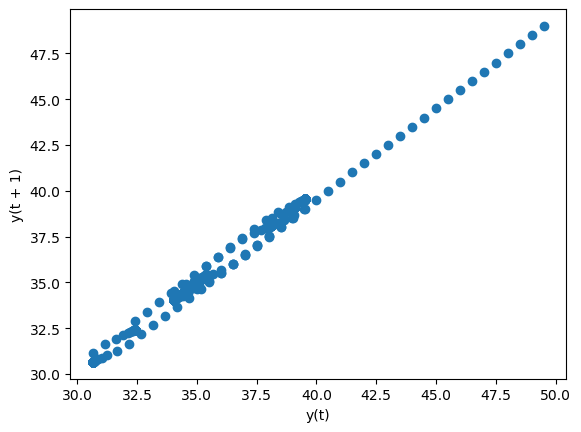

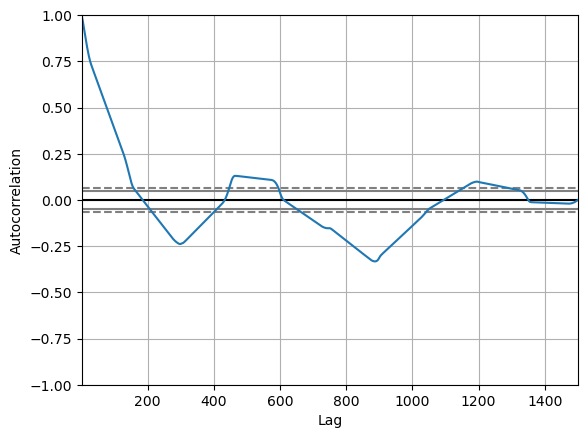

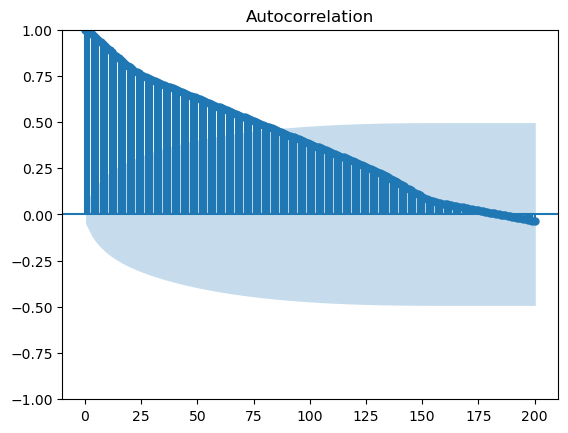

Uk.f-value:  0.0054174004248744075


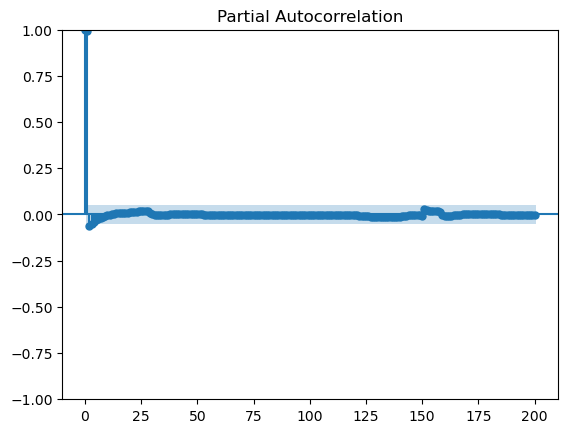

In [10]:
lag_plot(Uk.f)
plt.show()
autocorrelation_plot(Uk.f)
plt.show()
plot_acf(Uk.f, lags=200)
plt.show()
pacf = plot_pacf(Uk.f, lags=200)
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
# Run the test
#
df_stationarityTest = adfuller(Uk.f, autolag='AIC')
#
# Check the value of p-value
#
print("Uk.f-value: ", df_stationarityTest[1])

In [12]:
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
Uk_norm = pd.DataFrame(scaler.fit_transform(Uk), columns=Uk.columns)
Uk_norm

,f,Zc
0,1.000000,0.994927
1,0.973466,0.973710
2,0.946932,0.952493
3,0.920398,0.931275
4,0.893865,0.910058
...,...,...
1495,0.201345,0.997799
1496,0.201345,0.997799
1497,0.201345,0.997799
1498,0.201345,0.997799


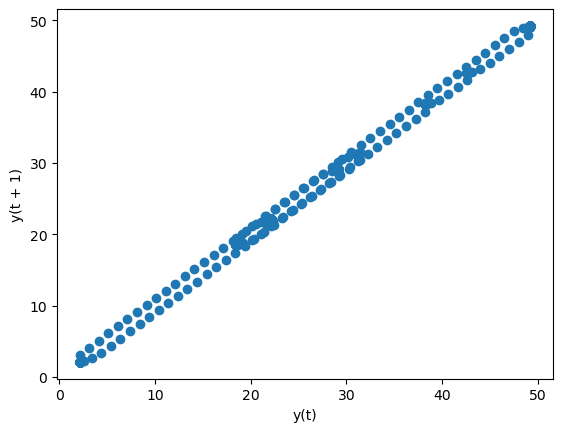

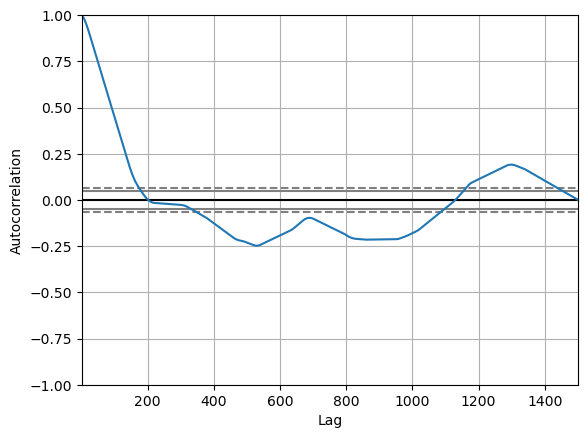

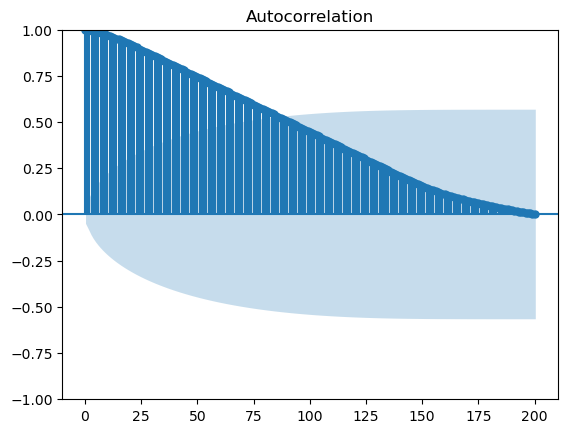

Uk.Zc-value:  0.39904644189033545


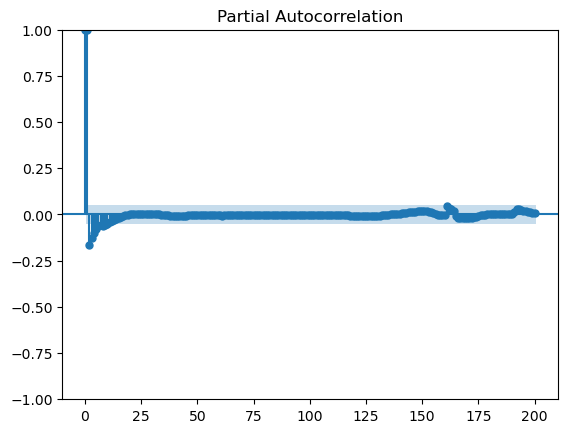

In [13]:
lag_plot(Uk.Zc)
plt.show()
autocorrelation_plot(Uk.Zc)
plt.show()
plot_acf(Uk.Zc, lags=200)
plt.show()
pacf = plot_pacf(Uk.Zc, lags=200)
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
# Run the test
#
df_stationarityTest = adfuller(Uk.Zc, autolag='AIC')
#
# Check the value of p-value
#
print("Uk.Zc-value: ", df_stationarityTest[1])

In [14]:
Time = np.arange(2000)
Time

array([   0,    1,    2, ..., 1997, 1998, 1999])

In [15]:
data = BCS['Xmk']
Xmk = pd.DataFrame.from_dict(data)
Xmk = Xmk.rename(index={0: "pbh", 1: "pwh", 2: "q", 3: "fq", 4: "Zcmk"})
Xmk = Xmk.transpose()
print (Xmk)
print (type(Xmk))
len(Xmk)
Xmk_norm = pd.DataFrame(scaler.fit_transform(Xmk), columns=Xmk.columns)
Xmk_norm

               pbh           pwh         q         fq       Zcmk
0     8.400189e+06  3.133126e+06  0.009354  49.468233  48.016983
1     8.507831e+06  3.168128e+06  0.009205  48.995605  47.133510
2     8.594622e+06  3.182838e+06  0.009027  48.463828  46.131730
3     8.659178e+06  3.194573e+06  0.008892  48.017018  45.144075
4     8.716330e+06  3.201637e+06  0.008717  47.456040  44.111467
...            ...           ...       ...        ...        ...
1495  9.952870e+06  2.632436e+06  0.006140  34.545111  49.136840
1496  9.937409e+06  2.633604e+06  0.006144  34.435354  49.140723
1497  9.949111e+06  2.630185e+06  0.006150  34.490368  49.128557
1498  9.930896e+06  2.629836e+06  0.006169  34.459537  49.126910
1499  9.951413e+06  2.631097e+06  0.006144  34.404706  49.131712

[1500 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>


,pbh,pwh,q,fq,Zcmk
0,0.000000,0.130963,1.000000,1.000000,0.972476
1,0.027872,0.139925,0.982554,0.975104,0.953823
2,0.050345,0.143691,0.961720,0.947093,0.932671
3,0.067060,0.146695,0.945919,0.923557,0.911817
4,0.081858,0.148504,0.925513,0.894008,0.890015
...,...,...,...,...,...
1495,0.402036,0.002769,0.624384,0.213926,0.996121
1496,0.398032,0.003068,0.624858,0.208144,0.996203
1497,0.401062,0.002192,0.625516,0.211042,0.995946
1498,0.396346,0.002103,0.627695,0.209418,0.995912


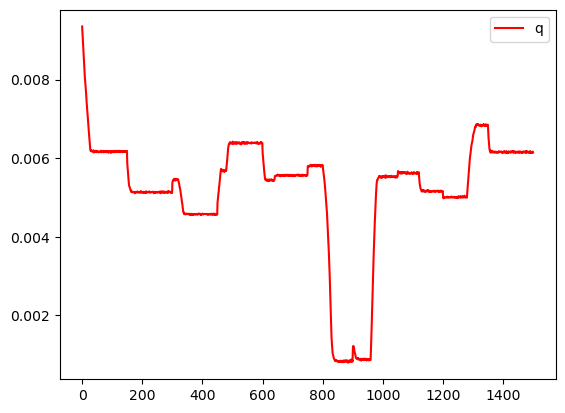

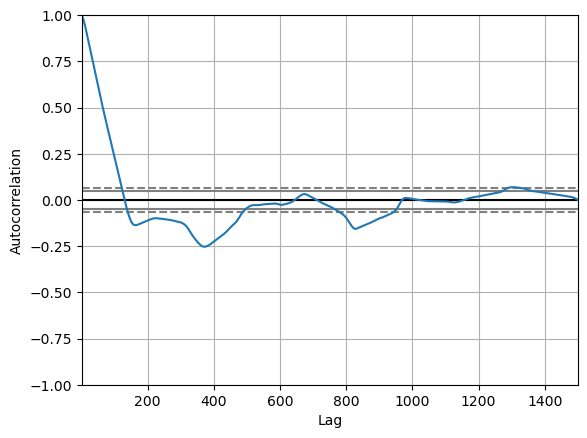

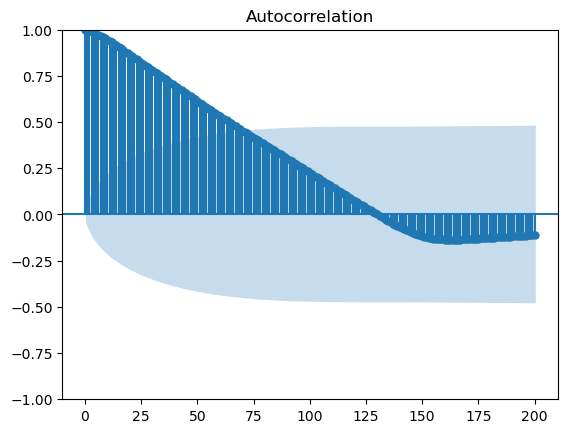

Xmk.q-value:  0.030715944131713798


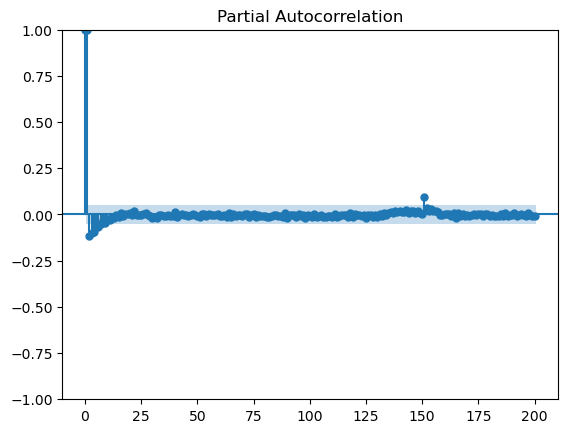

In [16]:
Xmk.plot(y='q',color='red')
plt.show()
autocorrelation_plot(Xmk.q)
plt.show()
plot_acf(Xmk.q, lags=200)
plt.show()
pacf = plot_pacf(Xmk.q, lags=200)
df_stationarityTest = adfuller(Xmk.q, autolag='AIC')
print("Xmk.q-value: ", df_stationarityTest[1])


In [17]:
#detector = QuantileDetector(high_quantile=0.99)
#detector.fit(scorer.score(Xmk.q))
#binary_anom = detector.detect(anom_score)

In [18]:
data = BCS['Yk']
Yk = pd.DataFrame.from_dict(data)
Yk

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,6.095902e+06,6.230018e+06,6.331843e+06,6.394987e+06,6.458573e+06,6.522287e+06,6.629510e+06,6.672427e+06,6.734878e+06,6.845886e+06,...,7.845026e+06,7.914055e+06,7.874079e+06,7.898158e+06,7.890124e+06,7.904613e+06,7.905478e+06,7.874014e+06,7.833260e+06,7.872013e+06
1,5.833079e+02,5.733520e+02,5.642667e+02,5.540585e+02,5.440039e+02,5.326765e+02,5.195583e+02,5.138611e+02,5.019460e+02,4.936186e+02,...,2.903958e+02,2.897856e+02,2.924253e+02,2.934553e+02,2.887637e+02,2.930016e+02,2.895453e+02,2.911856e+02,2.886925e+02,2.900771e+02
2,8.807322e+04,8.555028e+04,8.255216e+04,7.970732e+04,7.704475e+04,7.481316e+04,7.239008e+04,6.972288e+04,6.751840e+04,6.501318e+04,...,2.904697e+04,2.954265e+04,2.858063e+04,2.963721e+04,2.939758e+04,2.902934e+04,2.916627e+04,2.927055e+04,2.893775e+04,2.885170e+04
3,3.513551e+01,3.405712e+01,3.283042e+01,3.213548e+01,3.077948e+01,3.001805e+01,2.892923e+01,2.771788e+01,2.699132e+01,2.611429e+01,...,1.173351e+01,1.176499e+01,1.181894e+01,1.186949e+01,1.160177e+01,1.183167e+01,1.161586e+01,1.166042e+01,1.186014e+01,1.158413e+01
4,9.136175e-03,9.167443e-03,9.043100e-03,8.906152e-03,8.727621e-03,8.666098e-03,8.491777e-03,8.461661e-03,8.396681e-03,8.285185e-03,...,6.181598e-03,6.104496e-03,6.148137e-03,6.219268e-03,6.132937e-03,6.157634e-03,6.168569e-03,6.135832e-03,6.132152e-03,6.144571e-03
5,9.776915e-03,9.528417e-03,9.318720e-03,9.157564e-03,9.022008e-03,8.869014e-03,8.744451e-03,8.571528e-03,8.413246e-03,8.277203e-03,...,6.146026e-03,6.151788e-03,6.172193e-03,6.152085e-03,6.215334e-03,6.159976e-03,6.224641e-03,6.139910e-03,6.167641e-03,6.127634e-03


In [19]:
data = BCS['Yk']
Yk = pd.DataFrame.from_dict(data)
Yk = Yk.rename(index={0: "Pin", 1: "H", 2: "P", 3: "I", 4: "qc", 5:"qw"})
Yk = Yk.transpose()
print (Yk)
print (type(Yk))
Yk_norm = pd.DataFrame(scaler.fit_transform(Yk), columns=Yk.columns)
Yk_norm

               Pin           H             P          I        qc        qw
0     6.095902e+06  583.307903  88073.220277  35.135510  0.009136  0.009777
1     6.230018e+06  573.351985  85550.276445  34.057121  0.009167  0.009528
2     6.331843e+06  564.266695  82552.161541  32.830415  0.009043  0.009319
3     6.394987e+06  554.058537  79707.323564  32.135479  0.008906  0.009158
4     6.458573e+06  544.003870  77044.748777  30.779476  0.008728  0.009022
...            ...         ...           ...        ...       ...       ...
1495  7.904613e+06  293.001550  29029.343753  11.831667  0.006158  0.006160
1496  7.905478e+06  289.545261  29166.273190  11.615856  0.006169  0.006225
1497  7.874014e+06  291.185631  29270.551316  11.660421  0.006136  0.006140
1498  7.833260e+06  288.692521  28937.749928  11.860138  0.006132  0.006168
1499  7.872013e+06  290.077092  28851.701757  11.584131  0.006145  0.006128

[1500 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>


,Pin,H,P,I,qc,qw
0,0.000000,1.000000,1.000000,1.000000,0.996279,1.000000
1,0.031110,0.972059,0.963238,0.960516,1.000000,0.972401
2,0.054730,0.946561,0.919552,0.915602,0.985204,0.949112
3,0.069377,0.917913,0.878099,0.890158,0.968908,0.931213
4,0.084127,0.889694,0.839303,0.840510,0.947664,0.916158
...,...,...,...,...,...,...
1495,0.419555,0.185264,0.139664,0.146764,0.641855,0.598295
1496,0.419755,0.175564,0.141659,0.138863,0.643156,0.605476
1497,0.412457,0.180168,0.143178,0.140494,0.639261,0.596066
1498,0.403003,0.173171,0.138329,0.147807,0.638823,0.599146


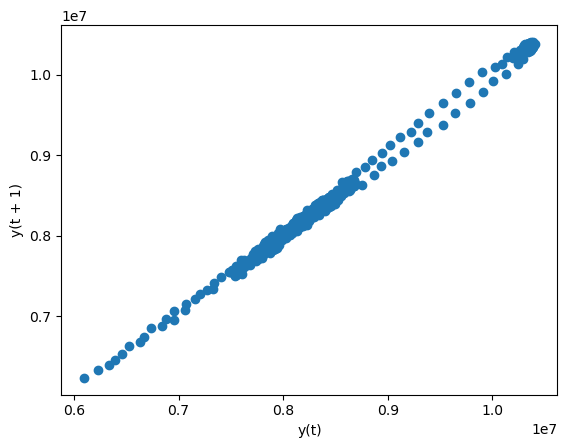

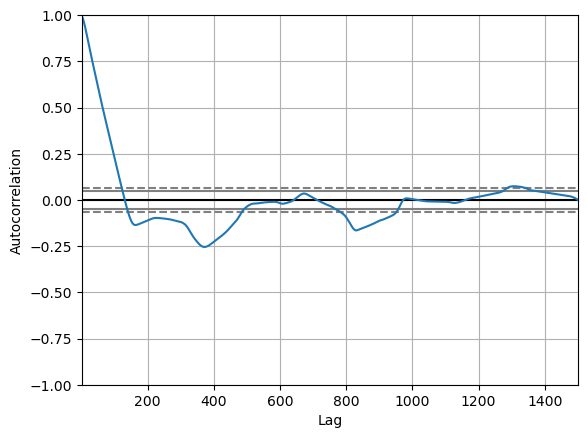

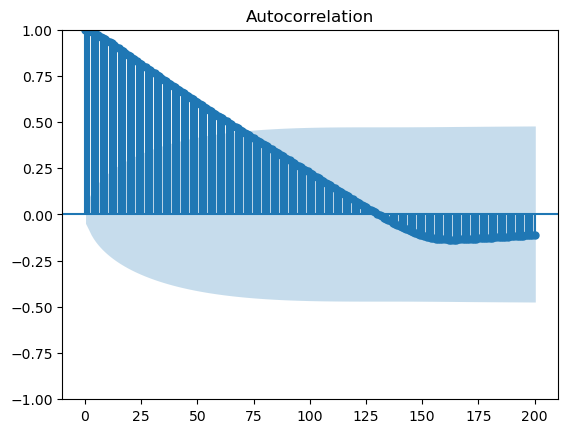

Yk.Pin-value:  0.045126990451131055


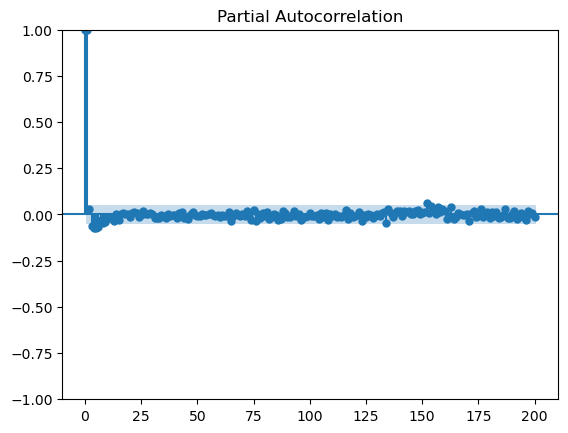

In [20]:
lag_plot(Yk.Pin)
plt.show()
autocorrelation_plot(Yk.Pin)
plt.show()
plot_acf(Yk.Pin, lags=200)
plt.show()
pacf = plot_pacf(Yk.Pin, lags=200)
df_stationarityTest = adfuller(Yk.Pin, autolag='AIC')
print("Yk.Pin-value: ", df_stationarityTest[1])

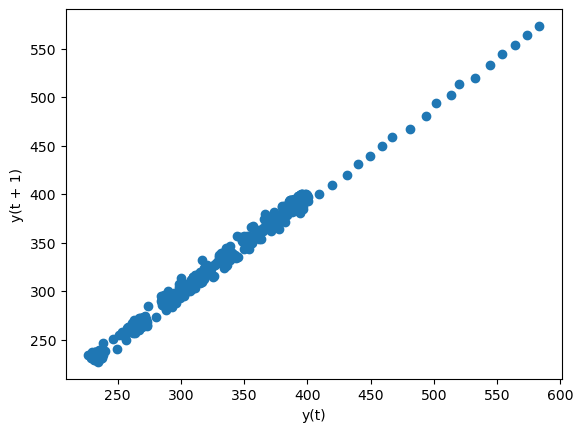

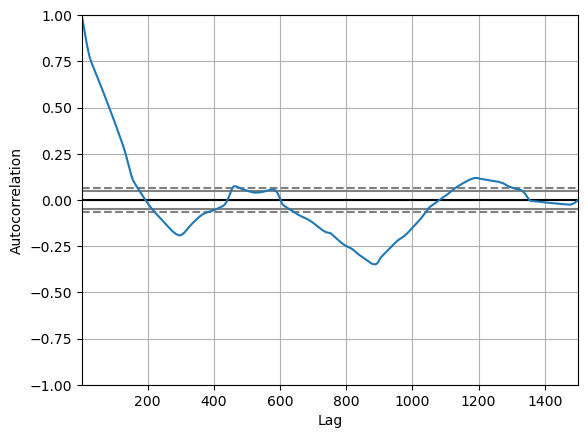

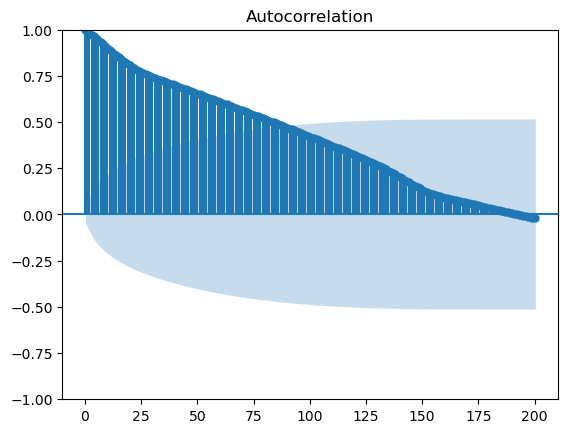

Yk.H-value:  0.009694632027657486


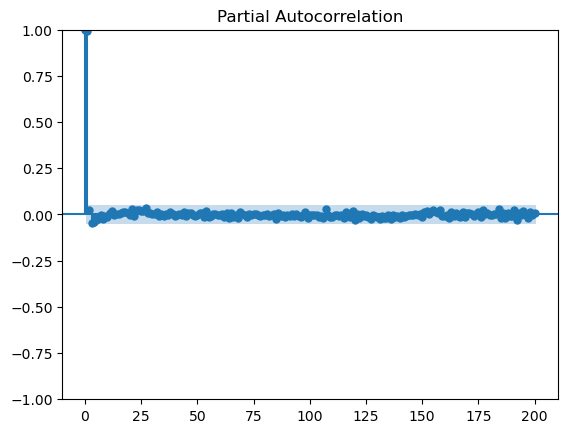

In [21]:
lag_plot(Yk.H)
plt.show()
autocorrelation_plot(Yk.H)
plt.show()
plot_acf(Yk.H, lags=200)
plt.show()
pacf = plot_pacf(Yk.H, lags=200)
df_stationarityTest = adfuller(Yk.H, autolag='AIC')
print("Yk.H-value: ", df_stationarityTest[1])

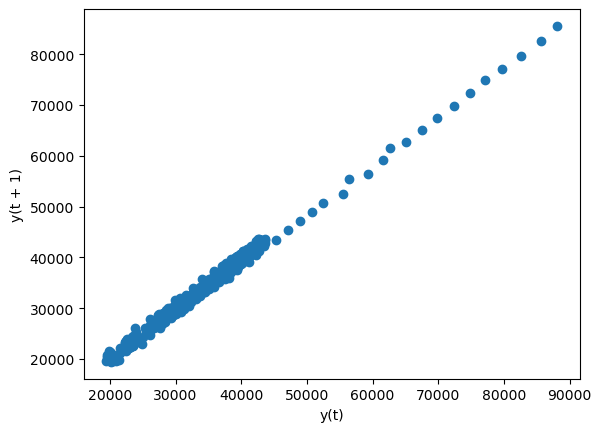

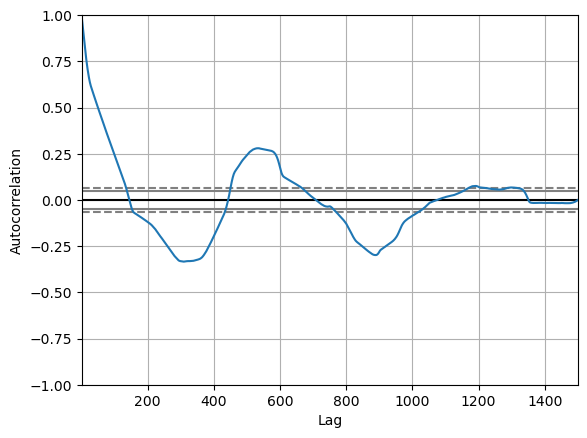

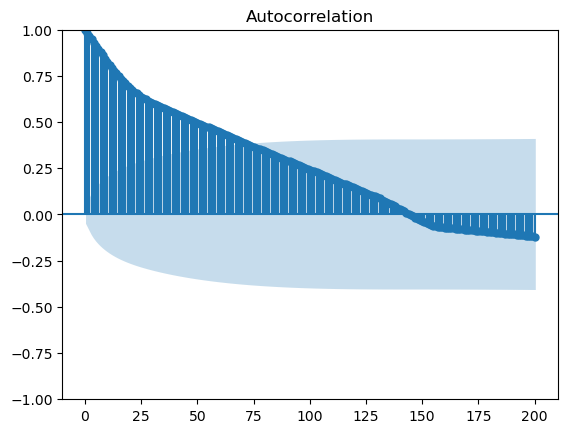

Yk.P-value:  0.0008012075831395505


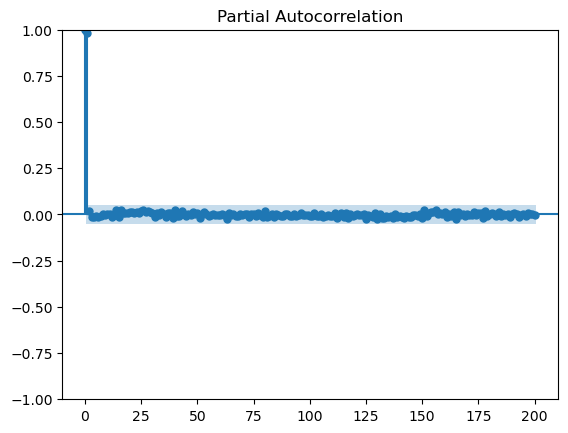

In [22]:
lag_plot(Yk.P)
plt.show()
autocorrelation_plot(Yk.P)
plt.show()
plot_acf(Yk.P, lags=200)
plt.show()
pacf = plot_pacf(Yk.P, lags=200)
df_stationarityTest = adfuller(Yk.P, autolag='AIC')
print("Yk.P-value: ", df_stationarityTest[1])

<Axes: xlabel='Zc', ylabel='q'>

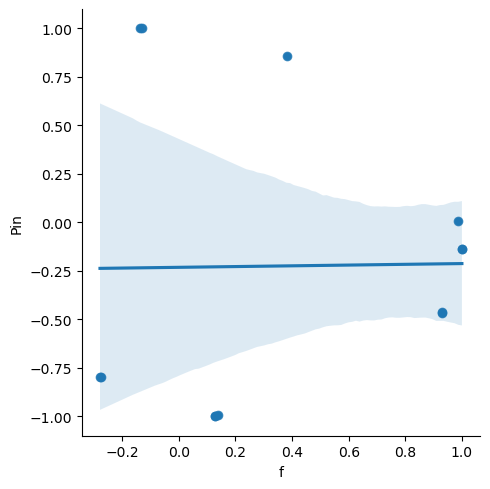

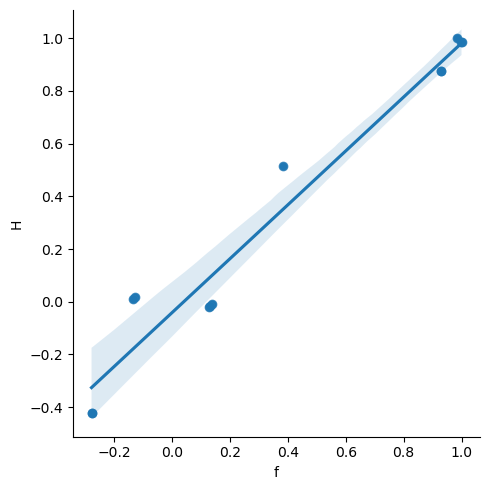

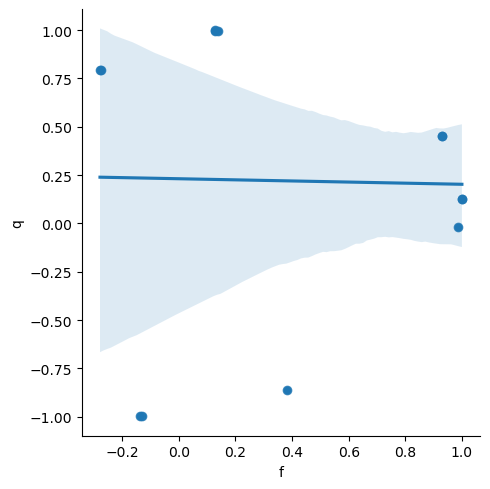

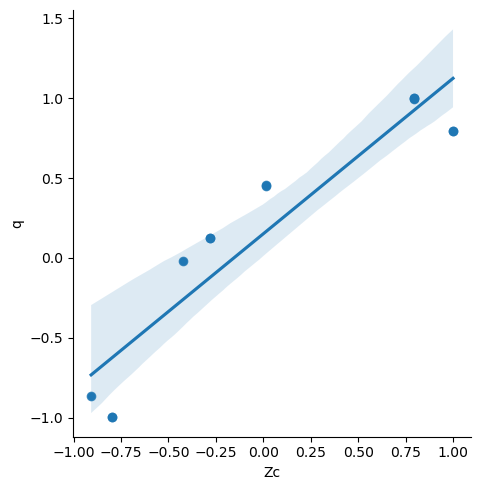

In [25]:
GN_df = pd.concat([Uk_norm, Xmk_norm,Yk_norm], axis=1)
GN_df
df = GN_df.corr()
df
sns.relplot(data=df, x="f", y="Pin")
sns.regplot(x="f", y="Pin", data=df)

sns.relplot(data=df, x="f", y="H")
sns.regplot(x="f", y="H", data=df)

sns.relplot(data=df, x="f", y="q")
sns.regplot(x="f", y="q", data=df)

sns.relplot(data=df, x="Zc", y="q")
sns.regplot(x="Zc", y="q", data=df)

In [24]:
df

,f,Zc,pbh,pwh,q,fq,Zcmk,Pin,H,P,I,qc,qw
f,1.000000,-0.278634,-0.128825,0.383460,0.127354,0.999810,-0.276749,-0.136945,0.985584,0.930862,0.930473,0.137638,0.129131
Zc,-0.278634,1.000000,-0.795709,-0.907186,0.795847,-0.279362,0.999870,-0.797255,-0.422805,0.014025,0.015717,0.793866,0.795615
pbh,-0.128825,-0.795709,1.000000,0.863273,-0.998385,-0.128198,-0.795329,0.999605,0.017273,-0.455591,-0.456701,-0.992255,-0.999915
pwh,0.383460,-0.907186,0.863273,1.000000,-0.864032,0.384016,-0.906287,0.859597,0.516924,0.048123,0.046721,-0.855675,-0.862948
q,0.127354,0.795847,-0.998385,-0.864032,1.000000,0.126709,0.795899,-0.997763,-0.018869,0.452632,0.453903,0.996460,0.998072
fq,0.999810,-0.279362,-0.128198,0.384016,0.126709,1.000000,-0.277497,-0.136332,0.985886,0.930749,0.930340,0.136706,0.128495
Zcmk,-0.276749,0.999870,-0.795329,-0.906287,0.795899,-0.277497,1.000000,-0.796867,-0.421042,0.015158,0.016828,0.794781,0.795215
Pin,-0.136945,-0.797255,0.999605,0.859597,-0.997763,-0.136332,-0.796867,1.000000,0.009737,-0.463156,-0.464272,-0.991653,-0.999265
H,0.985584,-0.422805,0.017273,0.516924,-0.018869,0.985886,-0.421042,0.009737,1.000000,0.874635,0.873972,-0.007653,-0.016979
P,0.930862,0.014025,-0.455591,0.048123,0.452632,0.930749,0.015158,-0.463156,0.874635,1.000000,0.998711,0.459775,0.455871


sns.relplot(data=df, x="Zc", y="Pin")
sns.regplot(x="Zc", y="Pin", data=df)
sns.relplot(data=df, x="Zc", y="H")
sns.regplot(x="Zc", y="H", data=df)

DataFrame  to disk

G_df = pd.concat([Uk, Xmk,Yk], axis=1)
G_df
G_df.to_excel("Dteste_des.xlsx")

DataFrame Normaliçado to disk

GN_df = pd.concat([Uk_norm, Xmk_norm,Yk_norm], axis=1)
GN_df
GN_df.to_excel("DN_plant_control_alto_teste_01042023.xlsx")